
Tamaño imagen 1: (565, 565, 3) pix
Tamaño imagen 2: (565, 565, 3) pix
Tamaño imagen 3: (565, 565, 3) pix




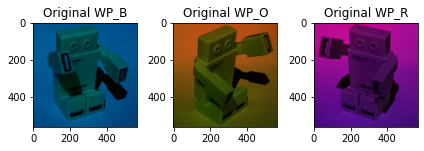

In [22]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


# Ahora quiero verla como imagen en color
img1 = cv.imread('WP_B.png')
img2 = cv.imread('WP_O.png')
img3 = cv.imread('WP_R.png')

# Dimensión de la imagen
print('\nTamaño imagen 1: {} pix'.format(img1.shape))
print('Tamaño imagen 2: {} pix'.format(img2.shape))
print('Tamaño imagen 3: {} pix'.format(img3.shape))
print('\n')

# Paso la imagen de BRG a RGB
imgRGB1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
imgRGB2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
imgRGB3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)

################# FIG: originales ##############################################
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(imgRGB1)
ax1.set_title('Original WP_B')

ax2=plt.subplot(132)
ax2.imshow(imgRGB2)
ax2.set_title('Original WP_O')

ax3=plt.subplot(133)
ax3.imshow(imgRGB3)
ax3.set_title('Original WP_R')

fig.tight_layout()    
plt.show()

Maximos RGB  166 118 31
Maximos RGB  40 110 194
Maximos RGB  173 47 208




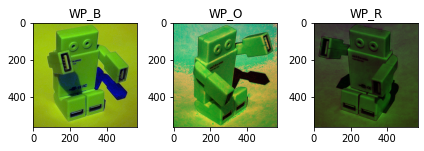

In [23]:
###################### Método WHITE PATCH#########################################
def white_patch(imagen):
    
    B,G,R =cv.split(imagen)

    imgLayerB = B.copy()
    imgLayerG = G.copy()
    imgLayerR = R.copy()
   
    max_valorB = np.max(imgLayerB)
    max_valorG = np.max(imgLayerG)
    max_valorR = np.max(imgLayerR)
    print("Maximos RGB ",max_valorR,max_valorG,max_valorB)
    
    factorR=float(255/max_valorR)
    factorG=float(255/max_valorG)
    factorB=float(255/max_valorB)

    alpha = float(max_valorG/max_valorR)#factor de mejora R
    beta = float(max_valorG/max_valorB)#factor de mejora B

    for i in range(B.shape[0]):
      for j in range(B.shape[1]):
        pixelB=factorB*imgLayerB[i,j]
        pixelR=factorR*imgLayerR[i,j]
        pixelG=factorG*imgLayerG[i,j]
        imgLayerR[i,j]=pixelR*alpha
        imgLayerG[i,j]=pixelG
        imgLayerB[i,j]=pixelB*beta
        
        
          
    imgLayerB=imgLayerB.round()
    imgLayerR=imgLayerR.round()
    imgLayerG=imgLayerG.round()

    np.clip(imgLayerB, 0, 255, out=imgLayerB) # Clip trunca a lo que se le diga (0 a 255)
    np.clip(imgLayerR, 0, 255, out=imgLayerR) # Clip trunca a lo que se le diga (0 a 255)
    np.clip(imgLayerG, 0, 255, out=imgLayerG) # Clip trunca a lo que se le diga (0 a 255)

    imgLayerB=imgLayerB.astype('uint8') # Hay que castear a 8 bits
    imgLayerR=imgLayerR.astype('uint8') # Hay que castear a 8 bits
    imgLayerG=imgLayerG.astype('uint8') # Hay que castear a 8 bits

    imgResultado = cv.merge ([imgLayerB,imgLayerG,imgLayerR]) 
    imgResultado = cv.cvtColor(imgResultado,cv.COLOR_BGR2RGB)

    return imgResultado

#######################Llamadas al método ######################################
img1= white_patch(imgRGB1)
img2= white_patch(imgRGB2)
img3= white_patch(imgRGB3)

################# FIG: White Patch ##############################################
# Nueva figura
fig = plt.figure()
print('\n')

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(img1)
ax1.set_title('WP_B')

ax2=plt.subplot(132)
ax2.imshow(img2)
ax2.set_title('WP_O')

ax3=plt.subplot(133)
ax3.imshow(img3)
ax3.set_title('WP_R')

fig.tight_layout()    
plt.show()

**CONCLUSIONES:** con la aplicación del algoritmo se logró obtener una imagen con una tonalidad más uniforme y con una mejora respecto a la original.